In [1]:
import tensorflow as tf

C:\Users\uesr\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import matplotlib
%matplotlib inline

In [3]:
from sklearn.datasets import  make_blobs

In [4]:
data=make_blobs(n_samples=100,n_features=3,centers=2,random_state=101)

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler=MinMaxScaler()
sc_data=scaler.fit_transform(data[0])

In [8]:
sc_data.shape


(100, 3)

In [48]:
x_d=sc_data[:,0]
y_d=sc_data[:,1]
z_d=sc_data[:,2]

In [49]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

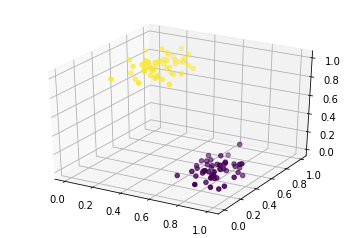

In [50]:
plot=plt.figure()
ax=plot.add_subplot(111,projection='3d')
ax.scatter(x_d,y_d,z_d,c=data[1])

In [74]:
import tensorflow as tf

In [98]:
num_in=3
num_hidden=2
num_out=num_in

In [114]:
learn_rate=0.01
X=tf.placeholder(tf.float64,shape=[None,num_in])

In [115]:
sc_data.shape

(100, 3)

In [116]:
hidden=tf.contrib.layers.fully_connected(X,num_hidden,activation_fn=None)
out_layer=tf.contrib.layers.fully_connected(hidden,num_out,activation_fn=None)

In [117]:
loss=tf.reduce_mean(tf.abs((out_layer-X)))
opt=tf.train.AdamOptimizer(learning_rate=learn_rate)

In [118]:
train=opt.minimize(loss)

In [119]:
init=tf.global_variables_initializer()

In [120]:
num_step=1000
with tf.Session() as sess:
    sess.run(init)
    for iter in range(num_step):
        _,input_,pr_loss=sess.run([train,X,loss],feed_dict={X:sc_data})
        #print(pr_loss)
        
    out_2d=hidden.eval(feed_dict={X:sc_data})

In [121]:
out_2d[:,0]

array([ 0.45708268,  0.43965909, -0.11292375,  0.42517154, -0.16781196,
        0.53076405,  0.49221191,  0.53016052, -0.16665125, -0.1668628 ,
       -0.16169142,  0.50418067,  0.35139819,  0.4136331 ,  0.36338601,
        0.32313154,  0.40895044, -0.13103071,  0.47899891,  0.40743593,
        0.41521409, -0.16703626,  0.40142923,  0.434632  , -0.18342394,
       -0.14022386,  0.51760271, -0.10230905, -0.149862  , -0.14608029,
        0.0196018 ,  0.36174689,  0.44283745, -0.01983723,  0.44127042,
        0.34266753,  0.50142462, -0.24593852,  0.45857669, -0.06156438,
        0.51372685,  0.51634156, -0.10233972, -0.19527327,  0.45259302,
       -0.12971482,  0.4014573 , -0.21212193,  0.37763266, -0.05473186,
       -0.08922823,  0.31946601,  0.39336808, -0.08252306,  0.37564078,
       -0.05661976,  0.44271641,  0.36628136, -0.09521366,  0.34654233,
        0.3830827 , -0.05245081,  0.45625887, -0.10285117, -0.14187493,
       -0.11024947, -0.16101845,  0.45312076,  0.43719329, -0.05

In [122]:
new_x=out_2d[:,0]
new_x.shape
new_y=out_2d[:,1]

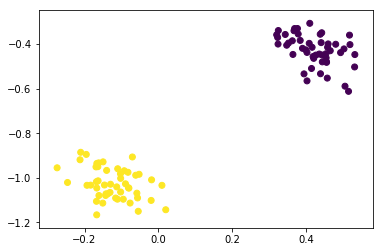

In [123]:
plt.scatter(new_x,new_y,c=data[1])


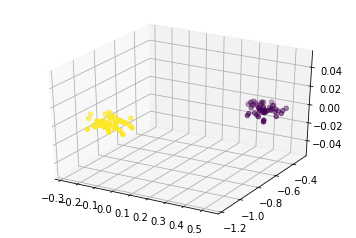

In [124]:
plot=plt.figure()
ax=plot.add_subplot(111,projection='3d')
ax.scatter(new_x,new_y,c=data[1])